## Linear  Regression: SGD Implementation

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [9]:
#converting to an array
X = np.asarray(X)
Y = np.asarray(Y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,Y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train.shape

(339, 13)

#ciitation:#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

#citation: https://usermanual.wiki/Document/Stochastic20Gradient20Descent20for20Linear20regression20MANUAL20implementation.1881838680.pdf

In [13]:
#Function to make prediction of y on given x
def predict_y(row, w,b):
    y_hat = b
    for i in range(len(row)):
        y_hat += w[i] * row[i]
    return y_hat

In [14]:
#SGD Function for Linear Regression

import random
def sgd(train,target, learning_rate, iterations, k):
    w = [0.0 for i in range(len(train[0]))]   
    b = 0.0                                    
    N = len(target)
    for iteration in range(iterations):
        sum_error = 0.0         
        #Implementing SGD
        row_num = random.sample(range(len(train)),k)
        for i in row_num:
            row = train[i]
            row_target = target[i]
            y_hat = predict_y(row, w, b)
            error = y_hat - row_target
            sum_error += error**2
            b = b - learning_rate * error
            for i in range(len(row)):
                w[i] = w[i] - learning_rate * error * row[i]        
        
        #learning_rate = learning_rate/2
    return w,b

In [15]:
learning_rate = 1e-6
iterations = 100000
k = 30
w,b = sgd(X_train,Y_train, learning_rate, iterations, k)
print("Wieghts")
print(w,b)

Wieghts
[-0.15972956564064322, 0.056374265488761628, -0.040405171042598602, 0.21118524249417914, 0.22810400103332118, 5.1374967587207845, -0.004222903829812062, -0.85800175666695355, 0.21244056317428303, -0.0053786497433178926, -0.30943798934764782, 0.016008929868734052, -0.43815024732542096] 0.548974877268


In [16]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(learning_rate='constant',eta0=1e-6,n_iter=100000)
clf.fit(X_train, Y_train)
w_= clf.coef_
#prediction of y on test data
pred = []
w = np.asarray(w)
b = b
for test_row in X_test:
    tmp = predict_y(test_row,w_,b)
    pred.append(tmp)
pred_ = np.asarray(pred)
pred_.shape


(167,)

In [17]:
print('weights using sgd_regressor',w_)

weights using sgd_regressor [-0.16339922  0.04435468 -0.03911007  0.6806072   0.23837652  5.7479011
 -0.01501688 -0.98251324  0.22900914 -0.01580758 -0.50752325  0.01911708
 -0.38810629]


In [18]:
print('weights using manual sgd',w)

weights using manual sgd [ -1.59729566e-01   5.63742655e-02  -4.04051710e-02   2.11185242e-01
   2.28104001e-01   5.13749676e+00  -4.22290383e-03  -8.58001757e-01
   2.12440563e-01  -5.37864974e-03  -3.09437989e-01   1.60089299e-02
  -4.38150247e-01]


In [19]:
#prediction of y on test data
pred = []
w = np.asarray(w)
b = b
for test_row in X_test:
    tmp = predict_y(test_row,w,b)
    pred.append(tmp)

In [20]:
pred_t = np.asarray(pred)
pred_t.shape

(167,)

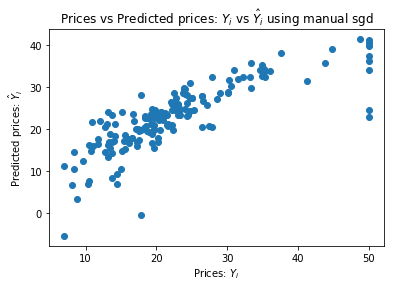

In [21]:
plt.scatter(Y_test, pred_t)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ using manual sgd")
plt.show()

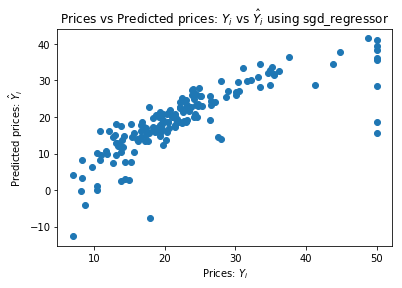

In [22]:
plt.scatter(Y_test, pred_)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ using sgd_regressor")
plt.show()

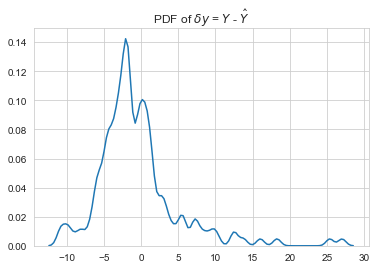

In [23]:
delta_y = Y_test - pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.title('PDF of $\delta{y}$ = ${Y}$ - $\hat{Y}$')
plt.show()


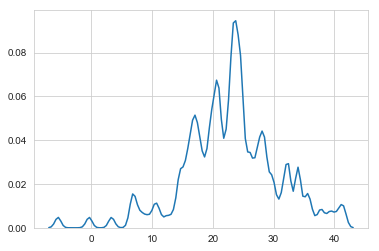

In [24]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred), bw=0.5)
plt.show()

In [27]:
import sklearn

In [28]:
print("MEAN SQUARED ERROR:",sklearn.metrics.mean_squared_error(Y_test, pred))

MEAN SQUARED ERROR: 31.5771946339


In [29]:
print("MEDIAN ABSOLUTE ERROR:",sklearn.metrics.median_absolute_error(Y_test, pred))

MEDIAN ABSOLUTE ERROR: 2.70747473875


In [30]:
print("MEAN SQUARED ERROR:",sklearn.metrics.mean_squared_error(Y_test, pred_))

MEAN SQUARED ERROR: 42.9779721366


In [31]:
print("MEDIAN ABSOLUTE ERROR:",sklearn.metrics.median_absolute_error(Y_test, pred_))

MEDIAN ABSOLUTE ERROR: 2.33763654496


## Observation:
1.From the above PDF we can observe that our model is good.
2.The MAE is approximately similar for both the models.
